In [3]:
import tensorflow as tf
import mediapipe as mp
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
mp_holistic=mp.solutions.holistic #holisitic model to make detections
mp_drawing=mp.solutions.drawing_utils # drawing utilities to draw detections

In [14]:
#function to read detections and draw them
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #since opencv reads in bgr format but for mediapipe we need to read in egb format
    image.flags.writeable=False #image is not writeable
    results=model.process(image) #detecting using mediapipe
    image.flags.writeable=True #image is now writeable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [15]:
#we grab our landmarks and render them onto the image
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS) #draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connections
    

In [17]:
#we will style our landmarks
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections

In [139]:
cap=cv2.VideoCapture(0) # accessing our webcam where cap is variable to read our feed
#in place of 0 you can specify your video to perform the detections on a video
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read the feed
        ret,frame=cap.read()
        #make detections
        image,results=mediapipe_detection(frame,holistic)
        #print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results) #applying to realtime loop
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()    

In [18]:
results.face_landmarks #to get landmarks of face
results.face_landmarks.landmark #to get landmarks as list
len(results.face_landmarks.landmark) #to get number of landmarks

NameError: name 'results' is not defined

The face and hand landmark models will return no values/error if nothing is detected.The pose model will return landmarks but the visibility value inside of each landmark will be low

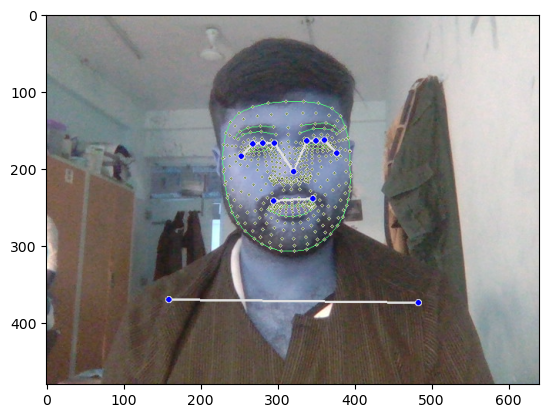

In [28]:
plt.imshow(image) #to show the last frame

The draw_landmarks function does not return the image but rather applies the landmark visualizations to the current image in place

In [19]:
draw_landmarks(frame,results)

In [25]:
results.pose_landmarks #to access last frame landmarks

landmark {
  x: 0.5376098155975342
  y: 0.18135857582092285
  z: -0.2966008484363556
  visibility: 0.9999953508377075
}
landmark {
  x: 0.5434552431106567
  y: 0.16589587926864624
  z: -0.2785439193248749
  visibility: 0.9999921321868896
}
landmark {
  x: 0.5471391677856445
  y: 0.16674432158470154
  z: -0.27860191464424133
  visibility: 0.999992847442627
}
landmark {
  x: 0.550226628780365
  y: 0.1675528883934021
  z: -0.27864429354667664
  visibility: 0.9999933242797852
}
landmark {
  x: 0.5329676270484924
  y: 0.16496756672859192
  z: -0.2810247242450714
  visibility: 0.9999828338623047
}
landmark {
  x: 0.5291547775268555
  y: 0.1650787591934204
  z: -0.2810439467430115
  visibility: 0.9999796152114868
}
landmark {
  x: 0.5252850651741028
  y: 0.16539987921714783
  z: -0.2809597849845886
  visibility: 0.999975323677063
}
landmark {
  x: 0.554331362247467
  y: 0.17752119898796082
  z: -0.15468791127204895
  visibility: 0.9999934434890747
}
landmark {
  x: 0.5203485488891602
  y: 0.1

Now we concatenate these values into a numpy array to extract these keypoints.

In [43]:
len(results.pose_landmarks.landmark)

33

In [24]:
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility]) #here we have extracted keypoints for one of our landmarks

In [23]:
#now we will extract keypounts for all landmarks
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
    #here we will get a list

In [27]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#here we will get an array

In [52]:
pose #to view the numpy array

array([[ 5.33531725e-01,  3.15752774e-01, -1.39082539e+00,
         9.99849141e-01],
       [ 5.65560222e-01,  2.44273603e-01, -1.35184026e+00,
         9.99795496e-01],
       [ 5.85578799e-01,  2.45969087e-01, -1.35184395e+00,
         9.99749243e-01],
       [ 6.04926288e-01,  2.47821391e-01, -1.35213935e+00,
         9.99739587e-01],
       [ 4.98207986e-01,  2.35471398e-01, -1.35338914e+00,
         9.99815643e-01],
       [ 4.73225445e-01,  2.32179880e-01, -1.35318065e+00,
         9.99806225e-01],
       [ 4.51541573e-01,  2.28641883e-01, -1.35343719e+00,
         9.99825478e-01],
       [ 6.36317432e-01,  2.55304664e-01, -9.04555619e-01,
         9.99775529e-01],
       [ 4.16144460e-01,  2.41121113e-01, -9.10534680e-01,
         9.99870658e-01],
       [ 5.65641761e-01,  3.88665289e-01, -1.21102798e+00,
         9.99875844e-01],
       [ 4.86927330e-01,  3.83436084e-01, -1.21235013e+00,
         9.99923885e-01],
       [ 7.39521742e-01,  5.61964691e-01, -5.94584882e-01,
      

In [53]:
pose.shape

(33, 4)

In [54]:
pose.flatten() #to get all landmarks in one big array

array([ 5.33531725e-01,  3.15752774e-01, -1.39082539e+00,  9.99849141e-01,
        5.65560222e-01,  2.44273603e-01, -1.35184026e+00,  9.99795496e-01,
        5.85578799e-01,  2.45969087e-01, -1.35184395e+00,  9.99749243e-01,
        6.04926288e-01,  2.47821391e-01, -1.35213935e+00,  9.99739587e-01,
        4.98207986e-01,  2.35471398e-01, -1.35338914e+00,  9.99815643e-01,
        4.73225445e-01,  2.32179880e-01, -1.35318065e+00,  9.99806225e-01,
        4.51541573e-01,  2.28641883e-01, -1.35343719e+00,  9.99825478e-01,
        6.36317432e-01,  2.55304664e-01, -9.04555619e-01,  9.99775529e-01,
        4.16144460e-01,  2.41121113e-01, -9.10534680e-01,  9.99870658e-01,
        5.65641761e-01,  3.88665289e-01, -1.21102798e+00,  9.99875844e-01,
        4.86927330e-01,  3.83436084e-01, -1.21235013e+00,  9.99923885e-01,
        7.39521742e-01,  5.61964691e-01, -5.94584882e-01,  9.98571813e-01,
        2.81616658e-01,  5.65281034e-01, -5.59169054e-01,  9.99396563e-01,
        8.36116016e-01,  

In [58]:
pose.shape #after we flatten the array

(132,)

In [84]:
len(results.left_hand_landmarks.landmark)

21

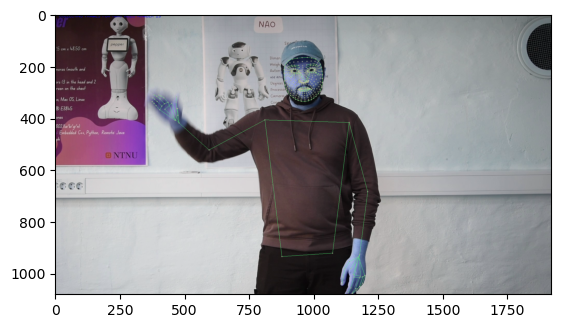

In [145]:
plt.imshow(image)

In [20]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [21]:
#if we dont have certain landmarks in our frame we will replace it with blank array instead of giving error
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) #we had collected 21 landmarks for left hand and 3 coorinates x,y,z

In [93]:
len(results.face_landmarks.landmark)*3

1404

In [22]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#initial bracket to specify three coordinate for a smaller array and then put all these smaller arrays into a larger array and finally convert them into a numpy array

In [26]:
#we will write all 4 keypoint extractions in 1 function
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh]) #here we concatenate all of our keypoints

In [123]:
len(results.pose_landmarks.landmark)

33

In [103]:
extract_keypoints(results).shape

(1662,)

In [107]:
result_test=extract_keypoints(results)

In [108]:
np.save('0',result_test)

Now we will setup variables to store our extracted keypoints

In [28]:
#path for exported data i.e numpy array
DATA_PATH=os.path.join('MP_Data')
#actions that we try to detect
#actions=np.array(['hello','thanks','iloveyou'])
actions=np.array(['hello'])
#we will be using 30 videos worth of data
no_sequences=30
#we will be using 30 frames to classify the actions i.e videos are going to be 30 frames in length
sequence_length=30

Key difference between action detection and other computer vision tasks is that a sequence of data rather than a single frame is used for detection

Now we create folders for each actions and subfolders for each sequence of actions
#hello
## 0
## 1
## ....
## 29
#thanks
#Iloveyou
We are storing each one of our 30 frames inside these 30 subfolders

In [105]:
os.chdir(r'C:\Users\UTKARSH\Desktop\data science\dl\22 aug')

In [29]:
for action in actions: #loop through our actions
    for sequence in range(no_sequences): #loop through 30 different videos
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence))) #make subdirectories
        except:
            pass    

We are going to collect 30 videos per action.Then each one of those videos sequences are going to contain 30 frames of data.Each frame will contain 1662 landmark values i.e 3*30 sequences,30 frames,1662 landmarks

We will apply breaks between frame collections of each sequence which allows us to reset and reposition ourselves to collect the action from start to finish.For example if we move our hands once then we collect 30 frames and then we break and again repeat the action.

In [ ]:
cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    # while cap.isOpened():
    #loop through actions
    for action in actions:
        #loop through sequences i.e videos
        for sequence in range(no_sequences):
            #loop through videos lenth i.e sequence length
            for frame_num in range(sequence_length):     #here we collect 30 frames of keypoints per video    
                #read the feed
                ret,frame=cap.read()
                #make detections
                image,results=mediapipe_detection(frame,holistic)
                #print(results)
                
                #draw landmarks
                draw_styled_landmarks(image,results) #applying to realtime loop
                
                #apply wait logic
                if frame_num == 0: #if we are at frame 0 then we will take a break
                    cv2.putText(image,'STARTING COLLECTION',(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv2.LINE_AA)
                    cv2.putText(image,'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000) #this helps to apply break of 2 seconds between each video
                else:
                    cv2.putText(image,'COLLECTING FRAMES FOR {} VIDEO NUMBER {}'.format(action,sequence),(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)   

                #now we export keypoints from the videos collected
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)        
                #show to screen
                cv2.imshow('OpenCV Feed',image)
                if cv2.waitKey(10) & 0xFF==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows() 

In [111]:
video_directory = r'C:\Users\UTKARSH\Desktop\data science\dl\22 aug\Waving_Hand_Right'  # Replace with the path to your video directory

video_files = [os.path.join(video_directory, f) for f in os.listdir(video_directory) if f.endswith('.mp4')]

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for video_file in video_files:
                cap = cv2.VideoCapture(video_file)
                
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    if not ret:
                        print(f"End of video file {video_file}.")
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # Apply wait logic
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                        cv2.putText(image, f'COLLECTING FRAMES FOR {action} VIDEO NUMBER {sequence}', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, f'COLLECTING FRAMES FOR {action} VIDEO NUMBER {sequence}', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    # Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                    np.save(npy_path, keypoints)

                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [112]:
cap.release()
cv2.destroyAllWindows()

In [30]:
video_directory = r'C:\Users\UTKARSH\Desktop\data science\dl\22 aug\Waving_Hand_Right'  # Replace with the path to your video directory
video_files = [os.path.join(video_directory, f) for f in os.listdir(video_directory) if f.endswith('.mp4')]

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences): #our sequence is 1 video and each video has 30 videos in length
            for frame_num in range(sequence_length):
                video_file = video_files[sequence]  # Ensure that each sequence corresponds to one video
                cap = cv2.VideoCapture(video_file)
                
                ret, frame = cap.read()
                if not ret:
                    print(f"End of video file {video_file}.")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, f'COLLECTING FRAMES FOR {action} VIDEO NUMBER {sequence}', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, f'COLLECTING FRAMES FOR {action} VIDEO NUMBER {sequence}', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))  # Path structure updated
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                np.save(npy_path, keypoints)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()


Now we preprocess our data and create labels and features.Here we will import certain dependancies like train_test_split and to_categorical fn from keras

In [47]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical #to convert into one hot encoding

In [48]:
#creating label map/array to represent our actions
label_map={label:num for num,label in enumerate(actions)}

In [49]:
label_map #dictionary

{'hello': 0}

In [50]:
#structure the keypoints 
#we will create a big array that will contain all data
#effectively we will have 30 arrays with 30 frames in each arrray with 1662 keypoints in each(in video its 90 arrays beacause they have 3 classes)
sequences,labels=[],[] #sequences is feature data/x_data and labels is labeldata/y_data
#we will be using our features and train a model to detect relationship between our labels
for action in actions:
    for sequence in range(no_sequences):
        window=[] #all different frames for that particular sequence
        for frame_num in range(sequence_length): #looping through each frame
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num))) #to load that frame
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])    
        #sequences array will have 90 videos and in it each will have 30 frames each

In [34]:
np.array(sequences).shape

(30, 30, 1662)

In [35]:
np.array(labels).shape

(30,)

In [36]:
X=np.array(sequences)


In [141]:
X

array([[[ 5.37609816e-01,  1.81358576e-01, -2.96600848e-01, ...,
          3.43568325e-01,  3.68103504e-01, -5.35363797e-03],
        [ 5.37570834e-01,  1.81321949e-01, -2.88097560e-01, ...,
          3.43559384e-01,  3.67645979e-01, -4.36127558e-03],
        [ 5.37520647e-01,  1.81300431e-01, -2.85104930e-01, ...,
          3.43563169e-01,  3.67882073e-01, -4.80140280e-03],
        ...,
        [ 5.37168741e-01,  1.81206644e-01, -2.82391727e-01, ...,
          3.43731731e-01,  3.67645591e-01, -4.58913902e-03],
        [ 5.37162483e-01,  1.81205094e-01, -2.82418042e-01, ...,
          3.43740702e-01,  3.67626011e-01, -4.62211482e-03],
        [ 5.37158191e-01,  1.81203648e-01, -2.82454580e-01, ...,
          3.43753487e-01,  3.67634356e-01, -4.60248441e-03]],

       [[ 5.37152410e-01,  1.79144502e-01, -2.75088847e-01, ...,
          3.90837759e-01,  3.55817288e-01, -5.65795461e-03],
        [ 5.37155747e-01,  1.78376898e-01, -2.74821579e-01, ...,
          3.80153686e-01,  3.69337261e

In [51]:
y=to_categorical(labels).astype(int)
#here we have converted our labels into one hot encoded representation

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05) #test percentage is 5 percent of our data

In [39]:
X_train.shape
#28 sequences inside our training data

(28, 30, 1662)

Now we will build and train our lstm network

In [1]:
from tensorflow.keras.models import Sequential #to build sequential neural network
from tensorflow.keras.layers import LSTM,Dense # lstm layer that gives temporal component for action detetection
from tensorflow.keras.callbacks import TensorBoard #trace and monitor our model

In [4]:
#create a log directory and setup tensorboard callbacks
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)
#tensorboard is a webapp offered as a part of tensorflow package that helps to monitor our neural network training 

In [7]:
model=Sequential() #instantiating model by sequential api
#now we will add 3 lstm layers
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662))) 
#64 lstm units and return sequences is true for next layer to read those sequences and input shape is 30 frames per prediction multiplied by 1662 values
#this means each video is 30 frames with 1662 keypoints
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu')) #next layer is dense layer so we dont return the sequences
model.add(Dense(64,activation='relu')) #dense layers are fully connected neurons
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax')) #this is actions layer
#return output of our model is 3 neural network units
#softmax returns values within probability range 0-1 with sum=1
#this we can use to preprocess and extract our actions

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
# categorical_crossentropy is necessary loss fn. for multiclass classification model

In [53]:
model.fit(X_train,y_train,epochs=50,callbacks=[tb_callback])

Epoch 1/50
1/1 [==============================] - 0s 323ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 156ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 167ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 167ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 174ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - cat

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 596,609
Trainable params: 596,609
Non-tr

Benefit of using mediapipe here is the number of parameters is very less as compared to millions in cnn layer

In [54]:
res=model.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [55]:
res[0]

array([1.], dtype=float32)

In [56]:
np.argmax(res[0])

0

In [57]:
actions[np.argmax(res[0])]

'hello'

In [58]:
action[np.argmax(y_test[0])]

'h'